# Treinando o modelo

In [12]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input,LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [5]:
df_sales, df_features, df_stores = load_data()
df = preprocess_data(df_sales, df_features, df_stores)

df = df[['Date', 'Store', 'Weekly_Sales']]
df['Date'] = df['Date'].view('int64') // 10**9

X = df[['Date', 'Store']].values
y = df['Weekly_Sales'].values.reshape(-1, 1)

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\F8091169\AppData\Local\Temp\ipykernel_29796\1707505251.py:5: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  df['Date'] = df['Date'].view('int64') // 10**9


In [13]:
inputs = Input(shape=(1, 2))
x = LSTM(50, activation='relu', return_sequences=True)(inputs)
x = LSTM(50, activation='relu')(x)
outputs = Dense(1)(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

model.save("model.h5")
print("Modelo salvo com sucesso!")

Epoch 1/10


ValueError: Input 0 of layer "functional_7" is incompatible with the layer: expected shape=(None, 1, 2), found shape=(None, 2)

2635/2635 ━━━━━━━━━━━━━━━━━━━━ 2s 675us/step


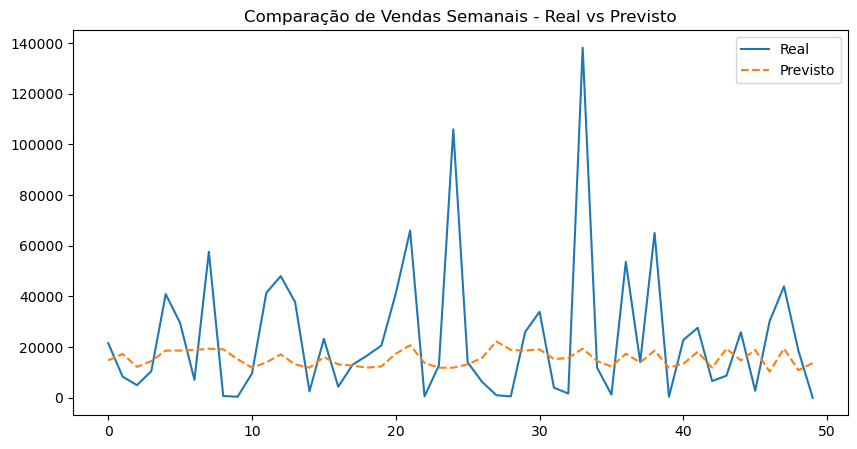

In [8]:
# Carregar o modelo treinado
model = keras.models.load_model("model.h5", compile=False)

# Compilar novamente o modelo para garantir que a métrica seja reconhecida
model.compile(optimizer='adam', loss='mse')

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Reverter a escala para valores originais
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

# Comparação visual entre valores reais e previstos
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test_inv[:50], label="Real")
plt.plot(y_pred_inv[:50], label="Previsto", linestyle="dashed")
plt.legend()
plt.title("Comparação de Vendas Semanais - Real vs Previsto")
plt.show()